In [121]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn import datasets

# from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [8]:
RANDOM_SEED = 0x0

## Nearest neighbor

In [123]:
X, y = datasets.make_blobs(
  n_samples=1000,
  n_features=2,
  centers=np.array([
    [-2, -2],
    [2, 2]
  ]),
  cluster_std=2.5,
  shuffle=True,
  random_state=RANDOM_SEED,
)

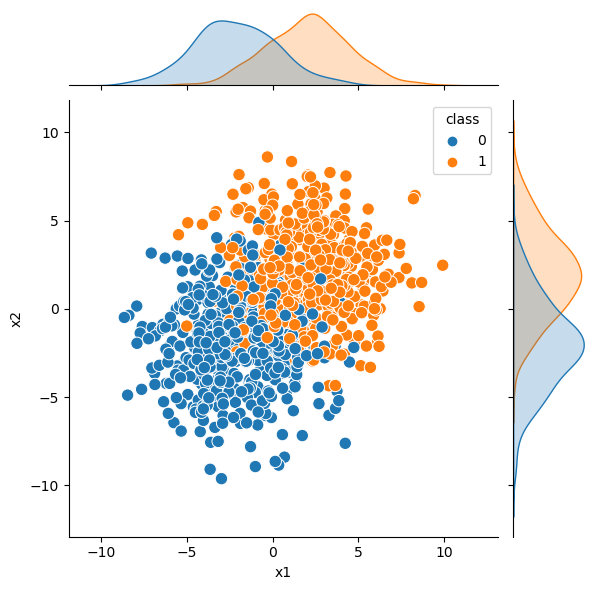

In [124]:
df = pd.DataFrame(X, columns=['x1', 'x2',]) 
df['class'] = y
ax = sns.jointplot(data=df, x="x1", y="x2", hue="class", s=80)
plt.show()

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [127]:
clf = DummyClassifier(strategy='uniform')
clf.fit(X_train, y_train)
y_hat_test = clf.predict(X_test)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.50      0.51      0.51       100
           1       0.51      0.50      0.50       100

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.50       200



In [128]:
clf = KNeighborsClassifier(n_neighbors=5, weights='distance')
clf.fit(X_train,y_train)

KNeighborsClassifier(weights='distance')

In [129]:
y_hat_test = clf.predict(X_test)

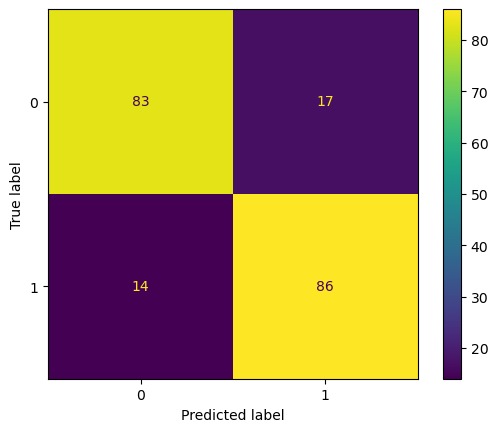

In [130]:
cm = confusion_matrix(y_test, y_hat_test, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [131]:
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       100
           1       0.83      0.86      0.85       100

    accuracy                           0.84       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200



In [132]:
# Identify the decision boundary by running the model prediction on a grid
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

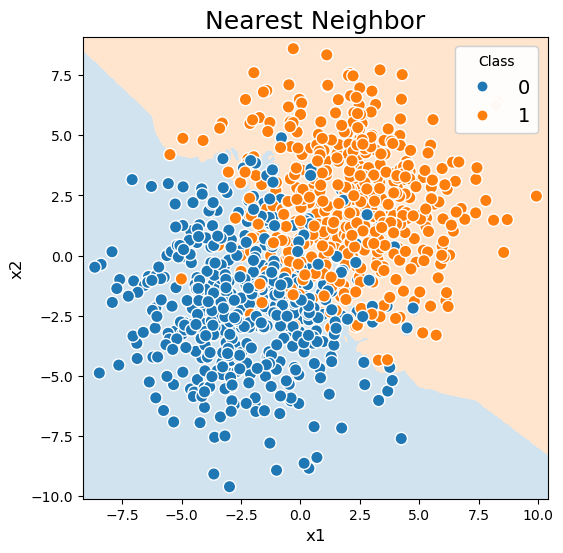

In [134]:
# blue and orange are the first two elements in the seaborn default color palette
my_cmap = matplotlib.colors.ListedColormap(sns.color_palette().as_hex()[:2])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=[6, 6])

ax.pcolormesh(xx, yy, Z, cmap=my_cmap, alpha=0.2)

# Plot also the training points
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='white', cmap=my_cmap, s=80)
legend = ax.legend(*scatter.legend_elements(), loc="upper right", title="Class", fontsize=14)
ax.add_artist(legend)

ax.set_xlabel('x1', fontsize=12)
ax.set_ylabel('x2', fontsize=12)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
# ax.set_xticks(())
# ax.set_yticks(())
ax.set_title('Nearest Neighbor', fontsize=18)
# ax.legend(loc=2, fontsize=14)

plt.show()

## Logistic regression

In [135]:
clf = LogisticRegression(penalty='none', fit_intercept=True, solver='lbfgs', max_iter=1000, multi_class='auto')
clf.fit(X_train,y_train)

LogisticRegression(max_iter=1000, penalty='none')

In [136]:
y_hat_test = clf.predict(X_test)

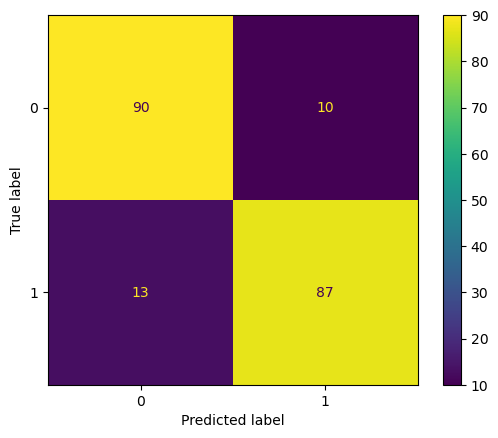

In [137]:
cm = confusion_matrix(y_test, y_hat_test, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [138]:
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       100
           1       0.90      0.87      0.88       100

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.88       200



In [139]:
# Identify the decision boundary by running the model prediction on a grid
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Plot the predictions on the grid together with the training data and the analytical solution for the decision boundary

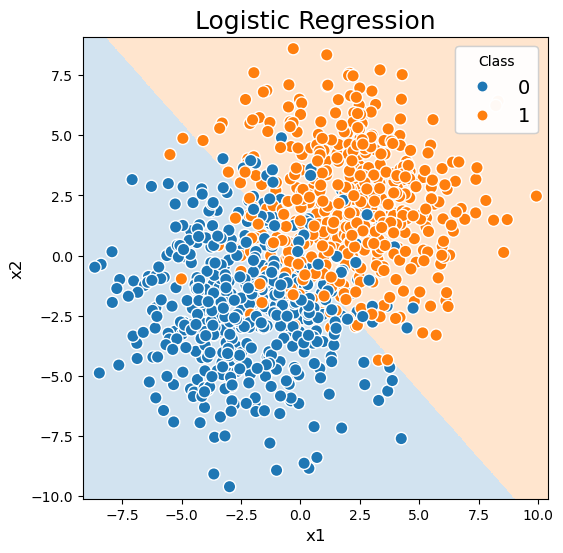

In [140]:
# blue and orange are the first two elements in the seaborn default color palette
my_cmap = matplotlib.colors.ListedColormap(sns.color_palette().as_hex()[:2])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=[6, 6])

ax.pcolormesh(xx, yy, Z, cmap=my_cmap, alpha=0.2)

# Plot also the training points
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='white', cmap=my_cmap, s=80)
legend = ax.legend(*scatter.legend_elements(), loc="upper right", title="Class", fontsize=14)
ax.add_artist(legend)

ax.set_xlabel('x1', fontsize=12)
ax.set_ylabel('x2', fontsize=12)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
# ax.set_xticks(())
# ax.set_yticks(())
ax.set_title('Logistic Regression', fontsize=18)
# ax.legend(loc=2, fontsize=14)

plt.show()

In [141]:
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       100
           1       0.90      0.87      0.88       100

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.88       200



## Softmax regression

In [104]:
X, y = make_blobs(
  n_samples=[400,400,200],
  n_features=2,
  centers=np.array([
    [0, -2],
    [2, 2],
    [-2, 2]
  ]),
  cluster_std=[1.5,1.5,2.5],
  shuffle=True,
  random_state=RANDOM_SEED,
)

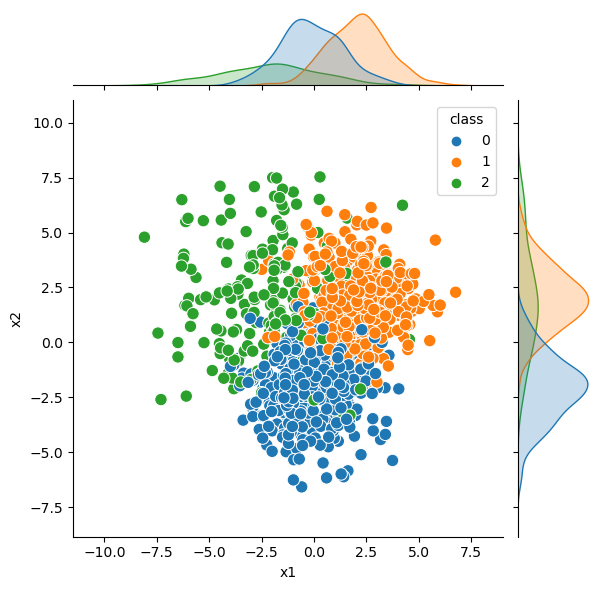

In [105]:
sns.color_palette()
c_palette_3 = sns.color_palette().as_hex()[:3]

df = pd.DataFrame(X, columns=['x1', 'x2',]) 
df['class'] = y
ax = sns.jointplot(data=df, x="x1", y="x2", hue="class", palette=c_palette_3, s=80)
plt.show()

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [107]:
clf = LogisticRegression(penalty='none', fit_intercept=True, solver='lbfgs', max_iter=1000, multi_class='multinomial')
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', penalty='none')

In [108]:
y_hat_test = clf.predict(X_test)

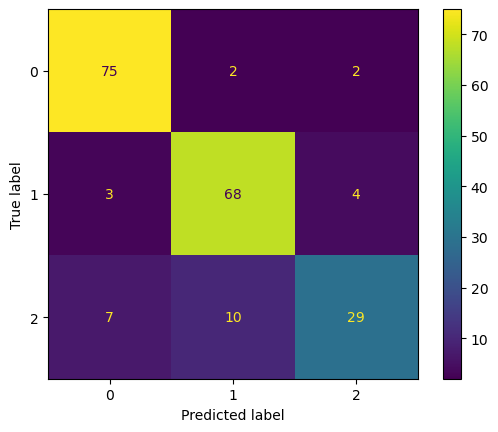

In [109]:
cm = confusion_matrix(y_test, y_hat_test, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [110]:
# Identify the decision boundary by running the model prediction on a grid
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

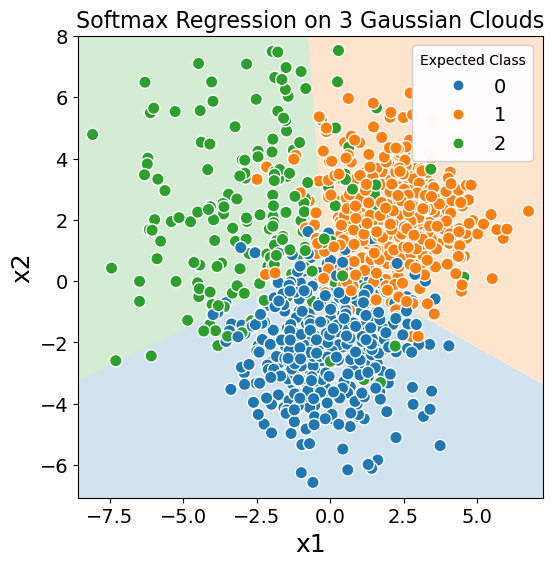

In [111]:
# blue and orange are the first two elements in the seaborn default color palette
# c_palette_3 = sns.color_palette().as_hex()[:3]
my_cmap = matplotlib.colors.ListedColormap(c_palette_3)

# Put the predictions on the grid into a color plot
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=[6, 6])

ax.pcolormesh(xx, yy, Z, cmap=my_cmap, alpha=0.2) #plt.cm.Spectral)

# Plot also the training points
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='white', cmap=my_cmap, s=80) #plt.cm.Spectral)
legend = ax.legend(*scatter.legend_elements(), loc="upper right", title="Expected Class", fontsize=14)
ax.add_artist(legend)

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_xlabel('x1', fontsize=18)
ax.set_ylabel('x2', fontsize=18)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

ax.set_title('Softmax Regression on 3 Gaussian Clouds', fontsize=16)
# plt.savefig('pics/softmax_3Gaussians.png', dpi=360)
plt.show()

In [112]:
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        79
           1       0.85      0.91      0.88        75
           2       0.83      0.63      0.72        46

    accuracy                           0.86       200
   macro avg       0.85      0.83      0.84       200
weighted avg       0.86      0.86      0.86       200

